<img src='http://imgur.com/1ZcRyrc.png' style='float: left; margin: 20px; height: 55px'>

# Capstone Project: H & M Recommender System
##    Part 3
---
## Contents
---

### [Part 1](part1_hm.ipynb)
1. Introduction
2. Problem Statement
3. Data Import and Cleaning

### [Part 2](part2_hm.ipynb)
4. [Exploratory Data Analysis](#4.-EDA)

### [Part 3](part3_hm.ipynb)
5.  [User-Item Matrix](#5.-User-item Matrix)
6.  [Challenges](#6.-Challenges)
7.  [Conclusion](#7.-Conclusion)


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from skimage import io
import random
from sklearn.preprocessing import OneHotEncoder

C:\Users\msyee\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [2]:
# reading merged_df 
merged_df = pd.read_csv('../data/merged_df.csv')

In [3]:
# selecting features
df1 = merged_df[['t_dat', 'customer_id', 'article_id', 'prod_name', 'product_type_name',
       'product_group_name',
       'graphical_appearance_name', 'colour_group_name',
       'perceived_colour_value_name',
       'perceived_colour_master_name',
       'department_name', 'index_name',
       'index_group_name', 'section_name',
       'garment_group_name', 'detail_desc']]

feature_subset = ['product_group_name',
       'graphical_appearance_name', 'colour_group_name',
       'perceived_colour_value_name',
       'perceived_colour_master_name',
       'department_name', 'index_name',
       'index_group_name', 'section_name',
       'garment_group_name']

In [4]:
#Choose features to build feature space
features = feature_subset
df1 = df1[['customer_id', 'article_id'] + features]
dummies_df = pd.get_dummies(df1, columns=features)
dummies_df

,customer_id,article_id,product_group_name_Accessories,product_group_name_Bags,product_group_name_Cosmetic,product_group_name_Furniture,product_group_name_Garment Full body,product_group_name_Garment Lower body,product_group_name_Garment Upper body,product_group_name_Garment and Shoe care,...,garment_group_name_Shorts,garment_group_name_Skirts,garment_group_name_Socks and Tights,garment_group_name_Special Offers,garment_group_name_Swimwear,garment_group_name_Trousers,garment_group_name_Trousers Denim,"garment_group_name_Under-, Nightwear",garment_group_name_Unknown,garment_group_name_Woven/Jersey/Knitted mix Baby
0,013a3d7d6d974a818bcb8c5181b4f5016f8973550f42e1...,580746002,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,013a3d7d6d974a818bcb8c5181b4f5016f8973550f42e1...,399256001,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,013a3d7d6d974a818bcb8c5181b4f5016f8973550f42e1...,710390001,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
3,013a3d7d6d974a818bcb8c5181b4f5016f8973550f42e1...,636323001,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,013a3d7d6d974a818bcb8c5181b4f5016f8973550f42e1...,678983002,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235956,dd8b551e8f4256c3cbefa7f1ac6d854c5f9c0bc48732cf...,874097003,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
235957,dd8b551e8f4256c3cbefa7f1ac6d854c5f9c0bc48732cf...,874097003,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
235958,dd8b551e8f4256c3cbefa7f1ac6d854c5f9c0bc48732cf...,812672001,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
235959,dd8b551e8f4256c3cbefa7f1ac6d854c5f9c0bc48732cf...,812672001,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# saving file dummies_df
dummies_df.to_csv('../data/dummies_df.csv', index = False)

In [7]:
# selecting customers who bought at least 2 items
minimum_items = 2
groupby_customer = dummies_df.groupby('customer_id')

l = []
cutomer_ids = []
article_ids = []
count = []
for key in groupby_customer.groups.keys():
    temp = groupby_customer.get_group(key)
    if temp.article_id.nunique() >= minimum_items:
        l.append(temp.drop('article_id', axis=1).sum(numeric_only=True).values)
        cutomer_ids.append(key)
        article_ids.extend(temp.article_id.values.tolist())   

In [8]:
# building user feature and normalize it
user_feature = pd.DataFrame(l, columns = dummies_df.columns[2:])
normalized_user_feature = user_feature.div(user_feature.sum(axis=1), axis=0)
normalized_user_feature.insert(0, 'customer_id', cutomer_ids)
normalized_user_feature = normalized_user_feature.set_index('customer_id')
normalized_user_feature.head(1)

,product_group_name_Accessories,product_group_name_Bags,product_group_name_Cosmetic,product_group_name_Furniture,product_group_name_Garment Full body,product_group_name_Garment Lower body,product_group_name_Garment Upper body,product_group_name_Garment and Shoe care,product_group_name_Items,product_group_name_Nightwear,...,garment_group_name_Shorts,garment_group_name_Skirts,garment_group_name_Socks and Tights,garment_group_name_Special Offers,garment_group_name_Swimwear,garment_group_name_Trousers,garment_group_name_Trousers Denim,"garment_group_name_Under-, Nightwear",garment_group_name_Unknown,garment_group_name_Woven/Jersey/Knitted mix Baby
customer_id,,,,,,,,,,,,,,,,,,,,,
0004f079e5f7fbf106301d8c32278e71a96adde0a9e3328d2fc01309796ebc4b,0.000000,0.0,0.0,0.0,0.000000,0.025000,0.037500,0.0,0.0,0.004167,...,0.0,0.000000,0.000000,0.000000,0.012500,0.016667,0.004167,0.025000,0.0,0.0
00158a314c37206e415b95c9807110978746707242257ba17108427736d97762,0.000000,0.0,0.0,0.0,0.000000,0.040000,0.000000,0.0,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.040000,0.000000,0.000000,0.020000,0.0,0.0
001a505b9356f58f064f776be43b54664cf842f4b0252a70d3c51afba3613f58,0.000000,0.0,0.0,0.0,0.000000,0.029630,0.029630,0.0,0.0,0.000000,...,0.0,0.000000,0.033333,0.000000,0.007407,0.003704,0.003704,0.018519,0.0,0.0
001df39b34e857f6735ffc6e16d6b31fb3a26f8d1328a983eb64c5018e08e487,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.0,0.0
0022ee8505e8946c0863a20c2e6f9822ebd13a4bafd376493fa0f44fd5ea4385,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ffefa8fa76909f9b9b3c14680d3e00dae891de5d1522f97a0fc14bdc6ee099d0,0.050000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
fff5300d1e80ad5dc05d180d953c35202d1a60fff015e870c30eae7b3e0feaba,0.003390,0.0,0.0,0.0,0.011864,0.010169,0.044068,0.0,0.0,0.001695,...,0.0,0.000000,0.001695,0.000000,0.018644,0.006780,0.003390,0.005085,0.0,0.0
fff93a0834e8b29be9697dfd73642a4c509090c6221e00e61c66e2e8e78162ea,0.000000,0.0,0.0,0.0,0.000000,0.033333,0.000000,0.0,0.0,0.000000,...,0.0,0.000000,0.066667,0.033333,0.000000,0.000000,0.000000,0.000000,0.0,0.0


In [9]:
# building item feature
item_feature = dummies_df.drop_duplicates(subset='article_id')
item_feature = item_feature[item_feature.article_id.isin(article_ids)].drop('customer_id', axis=1)
item_feature = item_feature.set_index('article_id')
item_feature.head(1)

,product_group_name_Accessories,product_group_name_Bags,product_group_name_Cosmetic,product_group_name_Furniture,product_group_name_Garment Full body,product_group_name_Garment Lower body,product_group_name_Garment Upper body,product_group_name_Garment and Shoe care,product_group_name_Items,product_group_name_Nightwear,...,garment_group_name_Shorts,garment_group_name_Skirts,garment_group_name_Socks and Tights,garment_group_name_Special Offers,garment_group_name_Swimwear,garment_group_name_Trousers,garment_group_name_Trousers Denim,"garment_group_name_Under-, Nightwear",garment_group_name_Unknown,garment_group_name_Woven/Jersey/Knitted mix Baby
article_id,,,,,,,,,,,,,,,,,,,,,
580746002,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
399256001,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
710390001,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
636323001,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
678983002,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575156033,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
575156031,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
575156027,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# building user-item matrix
scores = normalized_user_feature.dot(item_feature.T)
scores

article_id,580746002,399256001,710390001,636323001,678983002,660308004,399256018,711582001,153115019,688873016,...,888945002,767577063,769007011,759465010,903778001,575156033,575156031,575156027,874097003,812672001
customer_id,,,,,,,,,,,,,,,,,,,,,
0004f079e5f7fbf106301d8c32278e71a96adde0a9e3328d2fc01309796ebc4b,0.187500,0.400000,0.262500,0.229167,0.295833,0.145833,0.266667,0.420833,0.408333,0.241667,...,0.212500,0.129167,0.170833,0.237500,0.295833,0.062500,0.216667,0.058333,0.150000,0.150000
00158a314c37206e415b95c9807110978746707242257ba17108427736d97762,0.100000,0.200000,0.140000,0.120000,0.100000,0.100000,0.160000,0.200000,0.280000,0.120000,...,0.220000,0.120000,0.100000,0.100000,0.100000,0.000000,0.080000,0.020000,0.060000,0.060000
001a505b9356f58f064f776be43b54664cf842f4b0252a70d3c51afba3613f58,0.214815,0.366667,0.307407,0.240741,0.337037,0.114815,0.107407,0.396296,0.437037,0.155556,...,0.233333,0.177778,0.218519,0.277778,0.337037,0.081481,0.274074,0.085185,0.203704,0.203704
001df39b34e857f6735ffc6e16d6b31fb3a26f8d1328a983eb64c5018e08e487,0.050000,0.250000,0.150000,0.050000,0.150000,0.075000,0.100000,0.250000,0.650000,0.250000,...,0.750000,0.275000,0.150000,0.150000,0.150000,0.000000,0.050000,0.000000,0.150000,0.150000
0022ee8505e8946c0863a20c2e6f9822ebd13a4bafd376493fa0f44fd5ea4385,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.100000,0.100000,0.500000,0.100000,...,0.500000,0.200000,0.000000,0.000000,0.000000,0.100000,0.000000,0.200000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ffefa8fa76909f9b9b3c14680d3e00dae891de5d1522f97a0fc14bdc6ee099d0,0.150000,0.300000,0.250000,0.150000,0.250000,0.150000,0.100000,0.300000,0.350000,0.050000,...,0.100000,0.200000,0.150000,0.350000,0.250000,0.000000,0.150000,0.050000,0.150000,0.150000
fff5300d1e80ad5dc05d180d953c35202d1a60fff015e870c30eae7b3e0feaba,0.310169,0.376271,0.337288,0.279661,0.396610,0.181356,0.145763,0.425424,0.347458,0.171186,...,0.103390,0.166102,0.193220,0.337288,0.396610,0.071186,0.279661,0.077966,0.184746,0.184746
fff93a0834e8b29be9697dfd73642a4c509090c6221e00e61c66e2e8e78162ea,0.300000,0.566667,0.433333,0.333333,0.400000,0.133333,0.200000,0.566667,0.566667,0.133333,...,0.166667,0.100000,0.233333,0.400000,0.400000,0.000000,0.300000,0.000000,0.200000,0.200000


In [11]:
# getting recommendation for customers
def get_rcmnd(customer_id, scores):
    cutomer_scores = scores.loc[customer_id]
    customer_prev_items = groupby_customer.get_group(customer_id)['article_id']
    prev_dropped = cutomer_scores.drop(customer_prev_items.values)
    ordered = prev_dropped.sort_values(ascending=False)
    return ordered, customer_prev_items

In [12]:
# plotting previous items
def plot_prev(prev_items):
    fig = plt.figure(figsize=(20, 10))
    for item, i in zip(prev_items, range(1, len(prev_items)+1)):
        item = '0' + str(item)
        sub = item[:3]
        image = path + "/"+ sub + "/"+ item +".jpg"
        image = plt.imread(image)
        fig.add_subplot(1,6 , i)
        plt.imshow(image)

In [13]:
# plotting recommended items
def plot_rcmnd(rcmnds):
    fig = plt.figure(figsize=(20, 10))
    for item, i in zip(rcmnds, range(1, k+1)):
        item = '0' + str(item)
        sub = item[:3]
        image = path + "/"+ sub + "/"+ item +".jpg"
        image = plt.imread(image)
        fig.add_subplot(1,6 , i)
        plt.imshow(image)

In [14]:
# importing PCA
from sklearn.decomposition import PCA

In [15]:
# fitting pca to normalized user feature
pca = PCA(n_components= 100, svd_solver='full')
pca.fit(normalized_user_feature)
pca.explained_variance_ratio_.sum()

0.9631072985957981

In [19]:
# building user feature pcaand item feature pca
user_feature_pca = pd.DataFrame(pca.transform(normalized_user_feature), columns=['component_{}'.format(i) for i in range(1, 101)]).set_index(normalized_user_feature.index)
item_feature_pca = pd.DataFrame(pca.transform(item_feature), columns=['component_{}'.format(i) for i in range(1, 101)]).set_index(item_feature.index)

In [20]:
# building pca matrix
scores_pca = user_feature_pca.dot(item_feature_pca.T)

In [32]:
# getting recommendation and previous items
k = 6
customer_id = scores.index[1]
rcmnds, prev_items = get_rcmnd(customer_id, scores)
rcmnds_pca, prev_items = get_rcmnd(customer_id, scores_pca)
rcmnds = rcmnds.index.values[:k]
rcmnds_pca = rcmnds_pca.index.values[:k]
path = "../images"

In [22]:
# listing previous items
prev_items

224957    680262021
224958    680262006
224959    807174001
224960    832309007
224961    844409002
Name: article_id, dtype: int64

In [23]:
# listing recommendations
rcmnds

array([583060001, 492244014, 636505003, 642931001, 806225002, 589789002],
      dtype=int64)

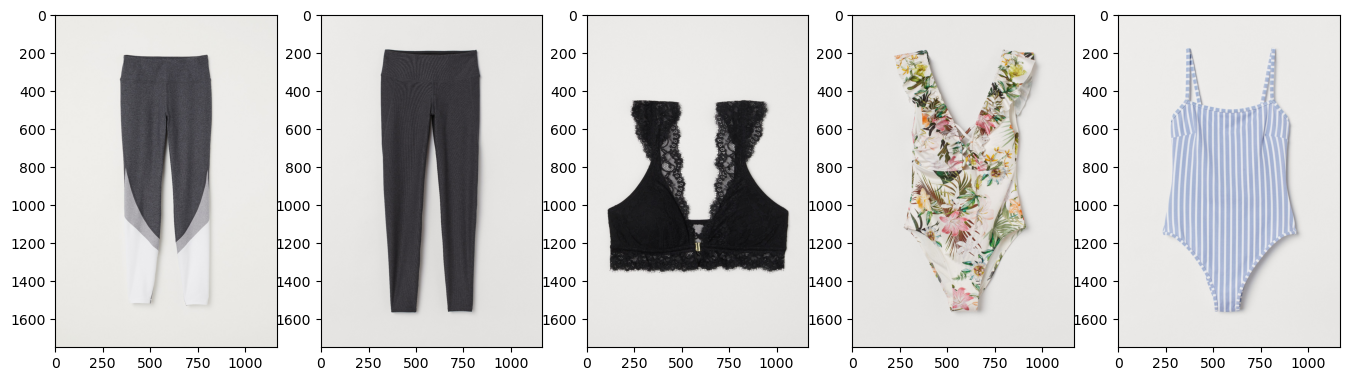

In [33]:
# plotting previous items
plot_prev(prev_items)

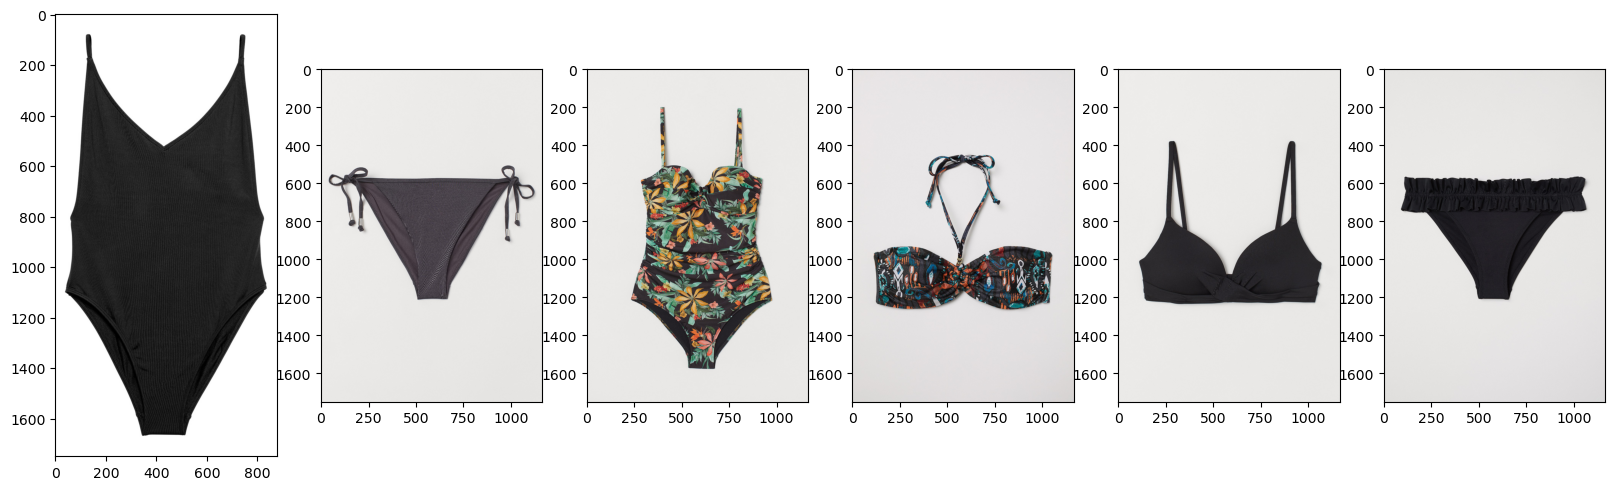

In [34]:
# plotting recommended items
plot_rcmnd(rcmnds)

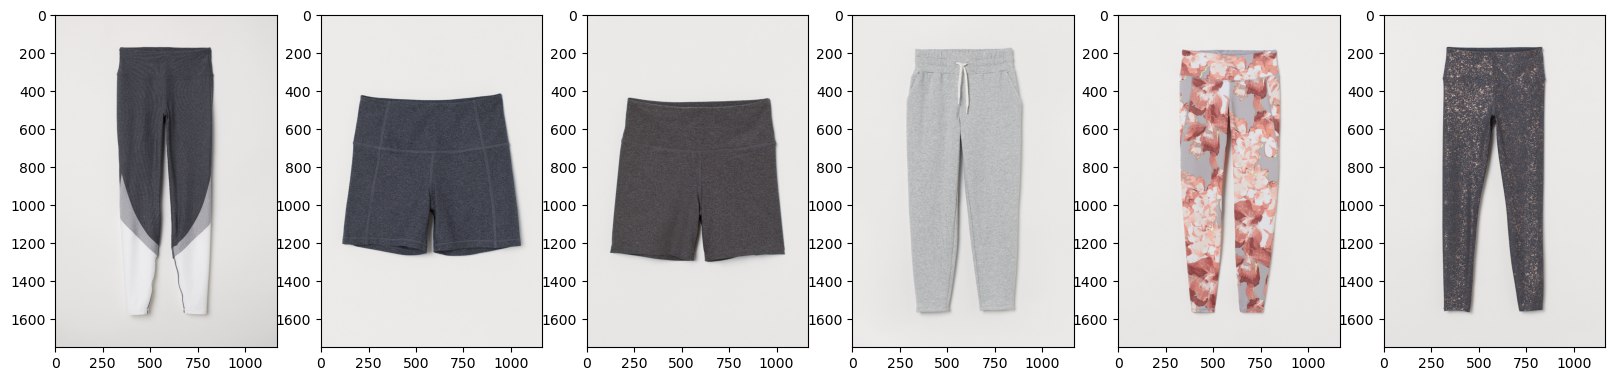

In [35]:
plot_rcmnd(rcmnds_pca)